# Lighthill's Elongated-Body Theory (EBT)

Lighthill's large-amplitude elongated-body theory utilizes reactive (rather than resistive) theory in order to interpret observational data on animal movements of arbitrary large amplitude. Reactive theory emphasizes reactive forces between a small volume of water and the parts of the animal's surface in contact with it. 

Lighthill's large-amplitude elongated-body theory applies to fish that swim with carangiform motion. Carangiform motion is characterized by fast forward motion, larger wave amplitudes towards the tail in the last half or one-third of the body length than in the anterior, and slower phase of lateral oscillations in this posterior section than that of the anterior. As a result, reactive forces seem to dominate in carangiform motion because the acceleration of water passed by the fish takes place very fast when the posterior section passes and flicks it into motion through the instantaneously acting virtual-mass effect.

The goal of Lighthill's 1971 paper is to extend reactive theory and slender-body theory so that it can be applied to interpret observational data on animal movements of arbitrary large amplitude. In this model, it is hopefully applied to carangiform movements. 

In terms of force and propulsion, Lighthill's elongated-body theory makes use of three principles in a frame of reference in which the water far from the fish is at rest:

1. Water momentum near a section of fish is in a direction perpendicular to the backbone and has magnitude equal to the virtual mass, $m$ per unit length, times the component $w$ of fish velocity in that direction.
2. Thrust can be obtained by considering rate of change of momentum within a volume enclosing the fish whose boundary at each instant includes a flat surface $\Pi$ perpendicular to the caudal fin through its posterior end.
3. In the momentum balance it is necessary to take into account transfer of momentum across $\Pi$ not only by convection but also by the action of the resultant $\frac{1}{2} mw^2$ of the pressures generated by the motions within the plane $\Pi$.

The coordinates used by Lighthill are:

* $y$-axis as the vertical
* $x$-axis and $z$-axis as the horizontal
* Lagrangian coordinate a along the fish body that takes values from 0 (tail) to $l$ (head), the length of the fish

where a left-handed system of axes is used.

The fish swims at a fixed horizontal level ($y=0$), where the constant mean direction of swimming is taken as that of the positive $x$-axis. Additionally, the position coordinates are regarded as $(x(a,t), z(a,t))$ as the point moves due (i) to swimming actions, (ii) to the resulting forward motion of the fish, and (iii) to any lateral recoil motions that may be involuntarily produced.

In addition, we have several notation:

* $(u,w)$ is the horizontal velocity vector (in the Lagrangian fish body frame), where $u$ is the tangential component (forward direction) and $w$ is the perpendicular component (lateral direction) of the fish body
* $(P,Q)$ is the force vector where $P$ is thrust and $Q$ is sideforce; $P$ is forward direction, $Q$ is lateral direction
* $V$ is the magnitude of the $(u,w)$
* $W$ is the component perpendicular to the direction of mean motion

In an elongated body form, the virtual mass is large in respect of the $w$ motions, while the $u$ motions have negligible virtual mass.

The inextensibility of the fish's spinal column requires $ \left(\frac{\partial x}{\partial a}\right)^2 + \left(\frac{\partial z}{\partial a}\right)^2 = 1$. 

The horizontal velocity vector (in a left-handed $x-z$ coordinate system) $\left(\frac{\partial x}{\partial t}, \frac{\partial z}{\partial t} \right)$ has a tangential component (relative to the spinal column) $u= \frac{\partial x}{\partial t} \frac{\partial x}{\partial a} + \frac{\partial z}{\partial t} \frac{\partial z}{\partial a}$ and a perpendicular component $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$.

The momentum per unit length of fish is represented by the vector $mw\left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ where the factor in parentheses is a unit vector in the $w$-direction. $m$ is the given cross-section of the fish, which can be approximated by $\frac{1}{4} \pi \rho s^2$, where $\rho$ is the water density and $s$ is the depth of the cross-section. $m$ should be a fixed, known function $m(a)$.

It is difficult to use the rate of change of the momentum in the wake. A better approach would be to study the rate of change of momentum in a part $V$ that excludes the wake. This is done by considering a vertical plane $\Pi$ intersecting the tip of the caudal fin at right angles to the tip of the spinal column. This plane swings around as the fine moves. At each instant, the part $V$ of water whose momentum is considered is that half-space, bounded by the plane $\Pi$, which includes the fish and excludes the wake. The momentum in $V$ can be written as the integral of $mw \left( -\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ from $0$ to $l$ with respect to $a$, and its rate of change can be written as the sum of three terms:

1. rate of change due to convection of momentum out of $V$ across the plane $\Pi$
2. rate of change due to the pressure force acting across $\Pi$
3. minus the reactive force $(P,Q)$ with which the fluid acts on the fish

In general, 
$(P,Q) = \left[mw \left( \frac{\partial z}{\partial t}, -\frac{\partial x}{\partial t} \right) - \frac{1}{2} mw^2 \left(\frac{\partial x}{\partial a}, \frac{\partial z}{\partial a} \right) \right]_{a=0} - \frac{d}{dt} \int_{0}^{l} mw \left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right) da$

The mean thrust can be written as $\overline{P} = \overline{ \left[ mw \left(\frac{\partial z}{\partial t}-\frac{1}{2} w \frac{\partial x}{\partial a} \right) \right]_{a=0}}$


In [1]:
%matplotlib inline

from scipy import spatial
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import SmoothBivariateSpline
from scipy.interpolate import UnivariateSpline
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import numpy.ma as ma
import csv
from scipy.integrate import simps
from mpl_toolkits.mplot3d import Axes3D

## Numerical Implementation

Once our symbolic model works, we will implement the model numerically. This implementation will be the most useful when we have arbitrary data and functions that cannot be solved analytically. 

We will mainly be working with numPy, which can handle numerical differentiation and integration.

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

We will use cubic splining in order to fit functions to kinematics data.

In [145]:
class Lighthill:
    """
    This is a class for calculating force numbers using Lighthill's
    large-amplitude elongated body theory.

    This method makes use of cubic splines to compute derivatives.

    Attributes:
        filename (string): The file to read kinematics data from.
        t (float numpy array): An array of times at which data is taken.
        m (float numpy array): An array of virtual mass per length along the
        fish's body.
        rho (float): The density of the fluid.
        numStep (int): The number of points to receive splined data at.
    """

    def __init__(self, filename, t, m, numStep):
        self.t = t
        # self.x = x
        # self.z = z
        self.m = m

        self.body = None
        self.extractBody(filename)
        self.tail = None
        self.extractTail()
        self.underwaterTail = None
        self.underwater()

        # self.shiftedx = None
        # self.shiftedy = None
        # self.shiftBody()

        self.a = None
        self.aCoordinates()

        self.a_new = None
        self.x = None
        self.z = None
        self.dxda = None
        self.dzda = None
        self.dxdt = None
        self.dzdt = None
        self.cubicSplinesinterp(numStep)

        # self.xMap = None
        # self.zMap = None
        # self.heatMap()

        self.w = None
        # self.m = (1/4)*np.pi*rho*(s**2)
        self.computeW()

        self.p = None
        self.q = None
        self.pavg = None
        self.Ptail = None
        self.Pinte = None
        self.computeP()
        self.computeQ()

        # self.thrustForce = (self.m*self.w*self.dzdt-(1/2)*self.m*(self.w**2)*
        #                     self.dxda-np.trapz(self.m*self.w*(-self.dzda),
        #                     self.a)/self.dt) # don't forget dt
        # self.sideForce = (self.m*self.w*(-self.dxdt)-(1/2)*self.m*(self.w**2)
        #                   *self.dzda-np.trapz(self.m*self.w*(-self.dxda),
        #                   self.a))
        # self.forceVector = np.array(list(zip(self.thrustForce,
        #                             self.sideForce)))  # (P, Q)

        # self.inextBool = None  # inextensibility Boolean
        # self.inextensibilityCheck()

    # def inextensibilityCheck(self,err=0):
        # """
        # The inextensibilityCheck function checks the inextensibility of the
        # fish body.

        # Parameters:
        #     err (float): The tolerance at which inextensibilityCheck is
        #     allowed to deviate (+/-) from 1.

        # Returns:
        #     boolean: Returns whether all of the elements in the array return
        #     1 +/- err.
        # """
        # inextensibilityArray = self.dxda**2 + self.dzda**2
        # self.inextBool = np.all([x>=(1-err) and x<=(1+err) for x in i for
        # i in inextensibilityArray])

    def extractBody(self, filename):
        """
        The extractBody function extracts kinematic data from a given midline
        file.

        Parameters:
            filename (string): The file to read kinematics data from.

        Returns:
            array: Returns a masked numpy array of array of arrays in the form
            [-y, x] along the body at a given time.
        """
        # masked array to cover -1000 values
        midlinedata = np.genfromtxt(filename, delimiter=",", skip_header=1,
                                    missing_values=-1000, dtype=float,
                                    usemask=True, unpack=True)

        # pre-allocate array to group coordinates together
        midlinearray = np.ma.empty([len(midlinedata)//2,
                                    len(midlinedata[0]), 2])

        for i in range(0, len(midlinedata)//2):
            # (x,y) from Excel file becomes (-y,x) to be consistent with
            # Lighthill axes
            midlinearray[i] = np.ma.dstack((-1*midlinedata[2*i+1]/100,
                                            midlinedata[2*i]/100))  # cm->m

        self.body = midlinearray

    def extractTail(self):
        """
        The extractTail function extracts the tail points from the kinematics
        data.

        Returns:
            array: Returns a masked numpy array of arrays, in which -y data is
            in its own array and x data is in its own array.
        """
        midlinearray = self.body

        # extract tail points at last valid index in masked array
        compressedmidline = np.ma.empty([len(midlinearray), 2])
        for i in range(0, len(midlinearray)):
            lastindex = np.ma.count(midlinearray[i])//2-1
            compressedmidline[i] = midlinearray[i][lastindex]

        # transpose midline data so that the array is in the form
        # [[-yarray] [xarray]]
        transposedmidline = np.transpose(compressedmidline)

        self.tail = transposedmidline

    def underwater(self):
        """
        The underwater function extracts the tail points that are underwater.

        Returns:
            array: Returns an array of arrays of -y data and x data underwater,
            where the air-water interface is determine to be at y=0.
        """
        tailarray = self.tail
        taily = tailarray[0]
        tailx = tailarray[1]
        # want the portion where y>=0 in our specified axes
        self.underwaterTail = np.ma.array([taily[taily >= 0],
                                           tailx[taily >= 0]], dtype=float)

    # # let's hold onto this shiftBody function while we rotate our axes
    # def shiftBody(self):
    #     shiftedx = np.ma.empty([len(self.body),len(self.body[0])])
    #     shiftedy = np.ma.empty([len(self.body),len(self.body[0])])
    #     for i in range(len(self.body)):
    #         currentx = np.transpose(self.body[i])[0]
    #                                 -np.min(np.transpose(self.body)[0])
    #         currenty = np.transpose(self.body[i])[1]
    #                                 -np.min(np.transpose(self.body)[1])
    #         shiftedx[i] = currentx
    #         shiftedy[i] = currenty
    #     self.shiftedx = shiftedy
    #     self.shiftedy = shiftedx

    def aCoordinates(self):
        """
        The aCoordinates function extracts the Lagrangian a coordinate along
        the fish body.

        Returns:
            array: Returns an array of arrays with Lagrangian coordinates along
            the body at a given time, with index 0 being the snout.
        """
        # pre-allocate da array
        daArray = np.ma.empty([len(self.body), len(self.body[0])-1])

        for i in range(0, len(self.body)):
            # -y and x coordinates for a given time
            currenty = np.transpose(self.body[i])[0]
            currentx = np.transpose(self.body[i])[1]
            daArray[i] = ma.sqrt((np.diff(currenty))**2+(np.diff(currentx))**2)

        # pre-allocate a array
        aArray = np.ma.empty([len(self.body), len(self.body[0])])

        for i in range(0, len(daArray)):
            # concatenate with 0, which should be the snout
            aArray[i] = np.ma.concatenate((np.array([0]),
                                           np.cumsum(daArray[i])), axis=0)
        self.a = aArray

    def cubicSplinesinterp(self, numStep):
        """
        The cubicSplinesinterp function computes many of the partial
        derivatives dx/da, dz/da, dx/dt, and dz/dt in Lagrangian's formalism.
        """
        # pre-allocate positions
        xArray = np.ma.empty([len(self.body), numStep])
        zArray = np.ma.empty([len(self.body), numStep])
        
        # pre-allocate a derivatives
        dxdaArray = np.ma.empty([len(self.body), numStep])
        dzdaArray = np.ma.empty([len(self.body), numStep])

        # pre-allocate t derivatives
        dxdtArray = np.ma.empty([len(self.body), len(self.body)])
        dzdtArray = np.ma.empty([len(self.body), len(self.body)])

        # new, scaled a array to remove masked points
        anewArray = np.ma.empty([len(self.body), numStep])

        # very inefficient way of computing partial derivatives!

        # for-loop to compute a derivatives
        for i in range(len(self.body)):
            colx = np.transpose(self.body[i])[0]
            colz = np.transpose(self.body[i])[1]
            currenta = self.a[i]
            last = np.ma.count(currenta)
            # for now, splined data will have 180 points
            anew = np.linspace(currenta[0], currenta[last-1], num=numStep,
                               endpoint=True)
            xaspline = InterpolatedUnivariateSpline(currenta[:last],
                                                    colx[:last])
            dxda = xaspline.derivative()
            zaspline = InterpolatedUnivariateSpline(currenta[:last],
                                                    colz[:last])
            dzda = zaspline.derivative()

            anewArray[i] = anew
            xArray[i] = xaspline(anew)
            zArray[i] = zaspline(anew)
            dxdaArray[i] = dxda(anew)
            dzdaArray[i] = dzda(anew)

        self.a_new = anewArray
        self.x = xArray
        self.z = zArray
        self.dxda = dxdaArray
        self.dzda = dzdaArray

        for i in range(len(self.body)):
            rowx = np.transpose(xArray)[i]
            rowz = np.transpose(zArray)[i]
            t = self.t

            xtspline = InterpolatedUnivariateSpline(t,
                                                    np.transpose(self.x)[i])
            dxdt = xtspline.derivative()
            ztspline = InterpolatedUnivariateSpline(t,
                                                    np.transpose(self.z)[i])
            dzdt = ztspline.derivative()

            dxdtArray[i] = dxdt(t)
            dzdtArray[i] = dzdt(t)

        self.dxdt = dxdtArray
        self.dzdt = dzdtArray

    def computeW(self):
        w = self.dzdt*np.transpose(self.dxda)-self.dxdt*np.transpose(self.dzda)
        self.w = w

    def computeP(self):
        wTail = np.transpose(self.w)[-1]
        dzdtTail = np.transpose(self.dzdt)[-1]
        dxdaTail = self.dxda[-1]
        tailTerm = self.m[-1]*wTail*dzdtTail-(1/2)*self.m[-1]*wTail**2*dxdaTail
        self.pavg = np.mean(tailTerm)
        self.Ptail = tailTerm
        #print("Tail term:", tailTerm)
        #print("average P at tail:", self.pavg)
        integrand = self.m*self.w*(-np.transpose(self.dzda))
        integral = simps(integrand, self.a_new)
        integralspline = InterpolatedUnivariateSpline(self.t, integral)
        integralTerm = integralspline.derivative()
        self.Pinte = integralTerm(self.t)
        #print("Integral Term", integralTerm(self.t))
        self.p = tailTerm - integralTerm(self.t)

    def computeQ(self):
        wTail = np.transpose(self.w)[-1]
        dxdtTail = np.transpose(self.dxdt)[-1]
        # transpose or not transpose a terms
        dzdaTail = self.dzda[-1]
        tailTerm = (self.m[-1]*wTail*(-dxdtTail)-(1/2)
                    * self.m[-1] * wTail**2*dzdaTail)
        #print("Tail term:", tailTerm)
        integrand = self.m*self.w*(np.transpose(self.dxda))
        integral = simps(integrand, self.a_new)
        integralspline = InterpolatedUnivariateSpline(self.t, integral)
        integralTerm = integralspline.derivative() 
        #print("Integral Term", integralTerm(self.t))
        self.q = tailTerm - integralTerm(self.t)
        
    # def heatMap(self):
    #     xMap = np.ma.empty([len(self.body),len(self.anew[0])])
    #     zMap = np.ma.empty([len(self.body),len(self.anew[0])])

    #     for it in range(len(self.body)):
    #         for ia in range(len(self.anew[0])):
    #             currentaArray = self.anew[it]
    #             currentaValue = currentaArray[ia]
    #             xMap[it,ia] = self.xa[it,ia]
    #             zMap[it,ia] = self.za[it,ia]

    #     self.xMap = xMap
    #     self.zMap = zMap

    """
    waveform generates plots for testing and verifying calculations
    need to rewrite this to comply with cubic spline data
    """
    def waveform(self):
        plt.subplot(111)
        
        #zvsx = plt.plot(self.x,self.z, label='z vs x')
        #dzdxvsx = plt.plot(self.x[1:],(self.dz/self.dx),label='dz/dx vs x')
        #avsx = plt.plot(self.x,self.a, label='a vs x')
        #wvsx = plt.plot(self.x[1:],self.w, label='w vs x')
        PvsQ = plt.plot(self.thrustForce,self.sideForce)
#         xvsa = plt.plot(self.aCoordinates(),self.)
#         yvsa = 
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    #def computeW(self):
        

        
    """print functions galore"""
    def test(self):
        print('t is: ', self.t)
        print('x is: ', self.x)
        print('z is: ', self.z)
        print('a is: ', self.a)
        print('w is: ', self.w)
        print('m is: ', self.m)
        print('dzdt is: ', self.dzdt)
        print('dxdt is: ', self.dxdt)
        print('dxda is: ', self.dxda)
        print('dzda is: ', self.dzda)
        #print('term 2 of w is: ', self.w2)
        print('The force vector is: ', self.forceVector)
        #print('Is the body inextensible? ', self.inextBool)
        print('The timesteps are: ', self.dt)
#         print('The x-steps are: ', self.dx)
#         print('The z-steps are: ', self.dz)
#         print('The a-steps are: ', self.da)

### Tests

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

### Cubic splining tests using data from above

### Tests using Bainbridge data

Below are the tests using the Bainbridge data mentioned in Lighthill's 1971 paper. The data is already broken up into derivatives. According to the paper:
* $w = V \sin{\alpha}$
* $W = {\partial z}/{\partial t} = V \sin{\alpha + \theta}$
* ${\partial x}/{\partial a} = \cos{\theta}$


In [29]:
tBainbridge = np.array([0.04, 0.08, 0.12, 0.16, 0.20, 0.24,
                       0.28, 0.32, 0.36, 0.40])
VBainbridge = np.array([0.50, 0.60, 0.74, 0.68, 0.52, 0.62,
                       0.87, 0.67, 0.52, 0.48]) 
sBainbridge = np.array([0.094, 0.087, 0.079, 0.083, 0.087,
                 0.088, 0.083, 0.084, 0.092, 0.093])
mBainbridge = (1/4)*np.pi*997*(sBainbridge**2) 
wBainbridge = np.array([0.03, 0.03, 0.06, 0.19, 0.09, -0.09,
                       -0.24, -0.12, -0.05, 0.00])
WBainbridge = np.array([0.15, 0.42, 0.64, 0.50, 0.12, -0.36,
                       -0.75, -0.48, -0.22, -0.02]) # dz/dt
dxdaBainbridge = np.array([0.97, 0.74, 0.57, 0.85, 1.00, 
                          0.88, 0.72, 0.81, 0.95, 1.00])
alphathetaBrindge = np.array([17,45,60,48,13,-36,-60,-46,
                              -25,-3])
alphaBainbridge = np.array([3,3,5,16,10,-8,-16,-10,-6,0])
thetaBainbridge = alphathetaBrindge - alphaBainbridge

In [ ]:
print(mBainbridge) # these values match his values in the table

To find $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$, we broke it into these parts given Bainbridge's data:

* $\frac{\partial z}{\partial t} = W$
* $\frac{\partial x}{\partial a}$
* $\frac{\partial x}{\partial t} = V \cos{\alpha+\theta}$
* $\frac{\partial z}{\partial a} = \sin{\theta}$

and we have matching values as in the table.

In [30]:
# trying to compute w

print((WBainbridge*dxdaBainbridge)
      -(VBainbridge*np.cos(np.deg2rad(alphathetaBrindge)))*
      (np.sin(np.deg2rad(thetaBainbridge))))
# values actually match! 

[ 0.02982447  0.02691193  0.06171374  0.18388206  0.09348281 -0.08131751
 -0.23782361 -0.11523234 -0.05556622  0.00508683]


We will now try to simply multiply values together as Lighthill did. All of the values match Lighthill's calculations.

In [31]:
mwW = mBainbridge*wBainbridge*WBainbridge 
mw2 = (1/2)*mBainbridge*(wBainbridge**2)*dxdaBainbridge
mw3 = mwW-mw2

print(mwW) 
print(mw2)
print(mw3) # all these values match Lighthill's


print(WBainbridge*dxdaBainbridge)

[ 0.03113531  0.07467824  0.18765945  0.51246573  0.06400992  0.19646962
  0.9709877   0.3182483   0.07290434 -0.        ]
[0.00302013 0.00197364 0.00501403 0.08276322 0.02400372 0.02161166
 0.11185778 0.03222264 0.00787035 0.        ]
[ 0.02811519  0.0727046   0.18264543  0.42970252  0.0400062   0.17485796
  0.85912992  0.28602566  0.06503398 -0.        ]
[ 0.1455  0.3108  0.3648  0.425   0.12   -0.3168 -0.54   -0.3888 -0.209
 -0.02  ]


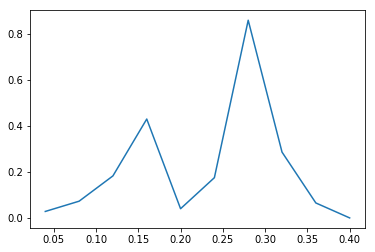

In [35]:
plt.plot(tBainbridge, mw3)

### Tests using midline data

From the archer fish midline CSV, we extracted the tail kinematics data from each set of time. We also attempted to use this real data to test the model.

In [4]:
"""
An attempt to import csv midline data and compute kinematics from those values
"""

midlinefile = "Mendelson_midlinedata.csv"
midlinedata = np.genfromtxt(midlinefile, delimiter=",", skip_header=1,
                            missing_values=-1000,dtype=float,
                            usemask=True, unpack=True) # Masked array to cover -1000 values

# pre-allocate array to group coordinates together
midlinearray = np.ma.empty([len(midlinedata)//2,len(midlinedata[0]),2])

for i in range(0,len(midlinedata)//2):
    midlinearray[i] = np.ma.dstack((midlinedata[2*i],midlinedata[2*i+1]))

# extract tail points 
compressedmidline = np.ma.empty([len(midlinearray),2])
for i in range(0,len(midlinearray)):
    lastindex = np.ma.count(midlinearray[i])//2-1
    compressedmidline[i] = midlinearray[i][lastindex]
    
# transpose midline data so that the array is in the form [[xarray] [yarray]]
transposedmidline = np.transpose(compressedmidline)

# making t array using given dt. Inefficient/redudant since it will be broken down into dt again... need to change something
midlinetime = np.concatenate((np.array([0]),np.cumsum(np.full(len(compressedmidline)-1,0.00111))))

# cross-section, guesstimate
archers = np.full(len(compressedmidline),0.08)

ymfile = "added_mass_per_length.csv"
ymdata = np.genfromtxt(ymfile, delimiter=",", skip_header=1,dtype=float,unpack=True) # Masked array to cover -1000 values

mdata = ymdata[1]/10
#print(mdata)

In [146]:
archerfish = Lighthill("Mendelson_midlinedata.csv", midlinetime, mdata, 180)

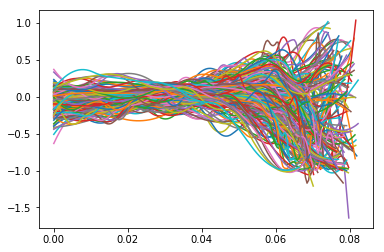

In [147]:
for i in range(len(archerfish.a_new)):
    plt.plot(archerfish.a_new[i], archerfish.dzda[i])
plt.show()

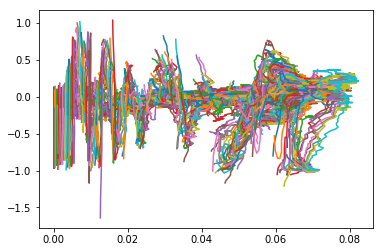

In [23]:
plt.plot(archerfish.a_new,np.transpose(archerfish.dzda))

Text(0.5,1,'splined from a')

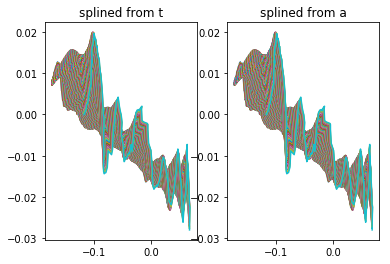

In [91]:
plt.subplot(1,2,1)
plt.plot(archerfish.xt,archerfish.zt)
plt.title('splined from t')

plt.subplot(1,2,2)
plt.plot(archerfish.xa,archerfish.za)
plt.title('splined from a')

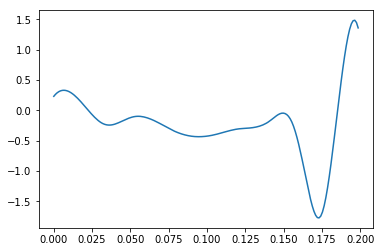

In [62]:
plt.plot(archerfish.t, np.transpose(archerfish.dxdt)[-1])

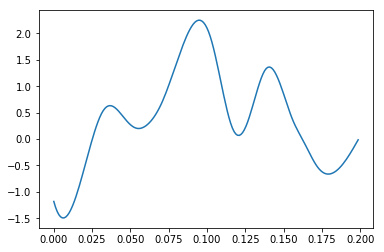

In [63]:
plt.plot(archerfish.t, np.transpose(archerfish.dzdt)[-1])

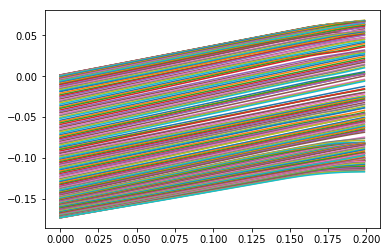

In [64]:
plt.plot(archerfish.t,np.transpose(archerfish.xt))

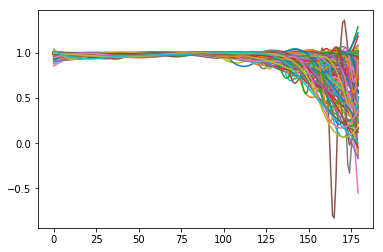

In [65]:
plt.plot(np.transpose(archerfish.dxda))

Text(0,0.5,'dz/da')

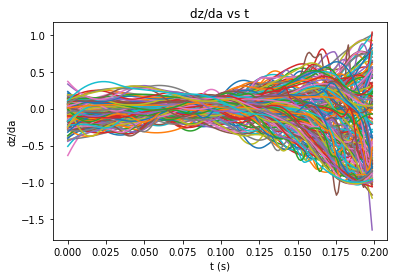

In [51]:
plt.plot(archerfish.t,np.transpose(archerfish.dzda))
plt.title('dz/da vs t')
plt.xlabel('t (s)')
plt.ylabel('dz/da')

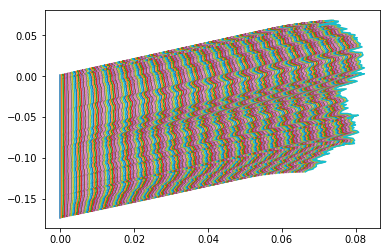

In [68]:
plt.plot(archerfish.a_new,archerfish.xa)

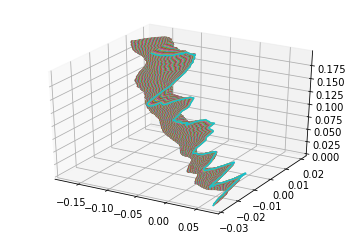

In [69]:
fig = plt.figure()
ax = fig.gca(projection='3d')

z = archerfish.t
x = archerfish.xt
y = archerfish.zt
ax.plot(x, y, z)

plt.show()


Text(0,0.5,'w (m/s)')

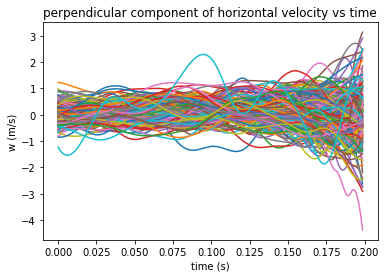

In [50]:
plt.plot(archerfish.t, archerfish.w)
plt.title('perpendicular component of horizontal velocity vs time')
plt.xlabel('time (s)')
plt.ylabel('w (m/s)')

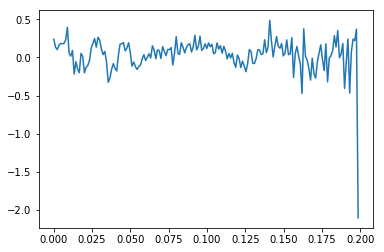

In [37]:
plt.plot(archerfish.t,archerfish.p)

In [75]:
print(archerfish.dzda)

[[ 1.00949427e-01  7.73069969e-02  5.48626125e-02 ... -9.37181240e-01
  -9.51315714e-01 -9.66352390e-01]
 [ 1.39257594e-01  1.11448325e-01  8.50980061e-02 ... -9.24631845e-01
  -9.40994765e-01 -9.58683833e-01]
 [ 1.21306174e-02 -9.13216011e-04 -1.30845807e-02 ... -8.86383526e-01
  -8.71632567e-01 -8.54770113e-01]
 ...
 [ 7.18181902e-02  8.59450505e-02  9.95585895e-02 ... -8.80754660e-01
  -8.58758648e-01 -8.34824645e-01]
 [ 1.21496346e-01  1.28820426e-01  1.36013386e-01 ... -9.69744244e-01
  -9.56911500e-01 -9.42550254e-01]
 [ 1.07042957e-01  1.30976654e-01  1.53748270e-01 ... -9.71495140e-01
  -9.63963512e-01 -9.55448027e-01]]


In [ ]:
print(archerfish.w)

In [ ]:
print(archerfish.dzda*archerfish.w*archerfish.m)

In [ ]:
print(len(archerfish.anew[0]))

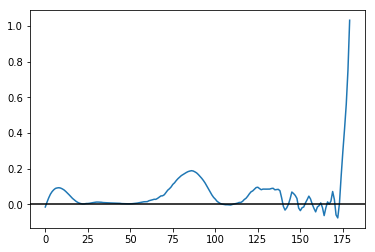

In [83]:
plt.plot(archerfish.p)
plt.axhline(y=0,color='black')

ValueError: x and y must be the same size

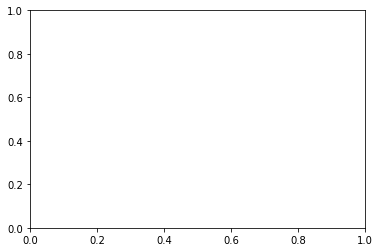

In [82]:
plt.scatter(archerfish.t,archerfish.p)
plt.axhline(y=0,color='black')

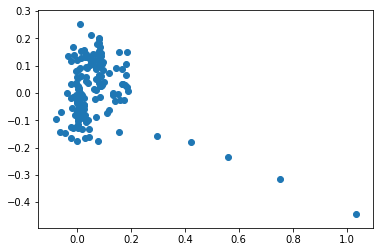

In [72]:
plt.scatter(archerfish.p,archerfish.q)

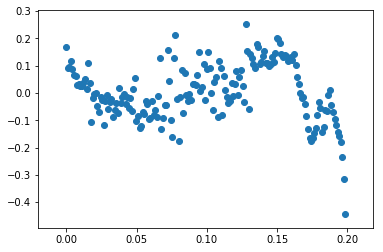

In [74]:
plt.scatter(archerfish.t,archerfish.q)

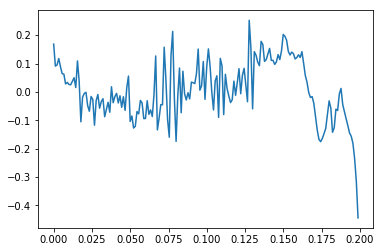

In [71]:
plt.plot(archerfish.t,archerfish.q)

In [64]:
print(archerfish.dzda)

[[ 1.00949427e-01  7.73069969e-02  5.48626125e-02 ... -9.37181240e-01
  -9.51315714e-01 -9.66352390e-01]
 [ 1.39257594e-01  1.11448325e-01  8.50980061e-02 ... -9.24631845e-01
  -9.40994765e-01 -9.58683833e-01]
 [ 1.21306174e-02 -9.13216011e-04 -1.30845807e-02 ... -8.86383526e-01
  -8.71632567e-01 -8.54770113e-01]
 ...
 [ 7.18181902e-02  8.59450505e-02  9.95585895e-02 ... -8.80754660e-01
  -8.58758648e-01 -8.34824645e-01]
 [ 1.21496346e-01  1.28820426e-01  1.36013386e-01 ... -9.69744244e-01
  -9.56911500e-01 -9.42550254e-01]
 [ 1.07042957e-01  1.30976654e-01  1.53748270e-01 ... -9.71495140e-01
  -9.63963512e-01 -9.55448027e-01]]


In [ ]:
print(np.argmin(archerfish.q))

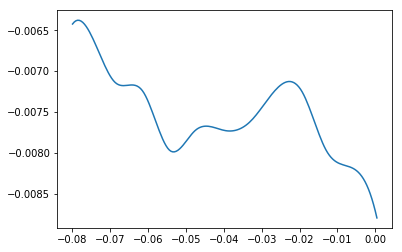

In [7]:
plt.plot(archerfish.xt[65],archerfish.zt[65])

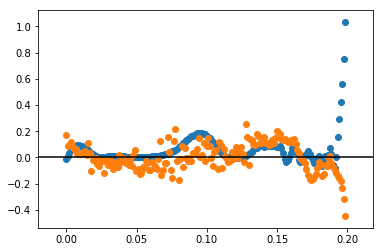

In [79]:
plt.scatter(archerfish.t,archerfish.p)
plt.scatter(archerfish.t,archerfish.q)
plt.axhline(y=0,color='black')

In [28]:
print(sum(x > 0 for x in archerfish.p))

84


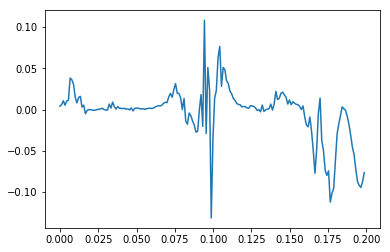

In [41]:
plt.plot(archerfish.t, archerfish.Ptail)

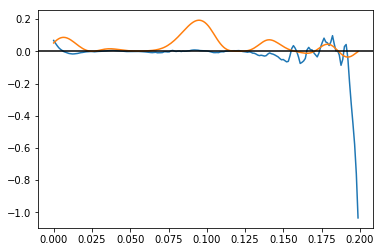

In [87]:
plt.plot(archerfish.t, archerfish.Pinte) #original
plt.plot(archerfish.t, archerfish.Ptail)
plt.axhline(y=0,color='black')

In [52]:
print(archerfish.Pinte) #original interpolated spline

[ 0.08424911 -0.01971656  0.00271733 -0.02354785  0.01929427  0.00570062
 -0.02633151 -0.00333679 -0.02182575 -0.02852869 -0.00688247 -0.00864162
 -0.06983786  0.03358873 -0.03986041  0.01117673  0.09315607  0.04546838
  0.04260412  0.01539927  0.03490875  0.01067775 -0.02961105 -0.05747373
  0.00603533  0.02839772  0.0570833   0.00197521 -0.02043266 -0.00070444
 -0.15851841 -0.0235635   0.00274588 -0.02939555 -0.00260645 -0.00170738
  0.03486727  0.0232563  -0.00422366 -0.04173355  0.01979102 -0.00311006
  0.05011229 -0.01443582 -0.02218943  0.07789072  0.00189609 -0.02925366
  0.01806079 -0.00742339 -0.00094205 -0.02579286 -0.00630548  0.02945501
 -0.04534662 -0.01288268  0.03429829  0.04676456  0.0533486  -0.01412397
  0.05836143  0.08627758  0.00056895  0.06761788  0.09714784  0.02930847
  0.06624841  0.05495373  0.00141604 -0.01293856 -0.07203551  0.01604731
  0.07530377 -0.07046183 -0.0354704   0.02958944 -0.03383762  0.00949127
  0.01991404 -0.01519775 -0.03280307  0.00848868 -0

[ 6.74319882e-02  5.08802980e-02  3.56598813e-02  2.21464324e-02
  1.23529495e-02  4.69587132e-03 -2.22381208e-03 -6.21539013e-03
 -1.06362186e-02 -1.35127487e-02 -1.51422270e-02 -1.64580197e-02
 -1.60434535e-02 -1.47689639e-02 -1.33975128e-02 -1.10583631e-02
 -8.40777525e-03 -7.09970902e-03 -4.96248760e-03 -3.38479465e-03
 -2.55109411e-03 -1.95441787e-03 -1.22775143e-03 -1.82284141e-03
 -3.16517398e-03 -1.91623638e-03 -9.34146920e-04 -6.37863842e-04
  2.38138403e-04  9.28082394e-04  1.32537014e-03  2.69780364e-03
  4.15188581e-03  4.86285938e-03  6.18748538e-03  6.09946233e-03
  5.18709458e-03  4.62500149e-03  3.99230850e-03  2.74709444e-03
  1.59929723e-03  2.05516590e-04 -8.80846326e-04 -1.55266690e-03
 -1.39553236e-03 -6.10409878e-04 -7.18897655e-04 -6.63387148e-04
 -4.94112995e-04 -7.38397541e-04 -9.50252889e-04 -1.35261284e-03
 -2.24402509e-03 -2.96761770e-03 -3.82173829e-03 -5.12306594e-03
 -6.63615325e-03 -7.51215576e-03 -8.27957187e-03 -7.50069991e-03
 -6.13509281e-03 -9.15486

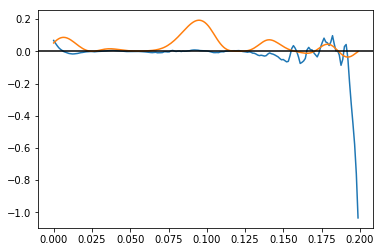

In [88]:
plt.plot(archerfish.t, archerfish.Pinte) # s=0
plt.plot(archerfish.t, archerfish.Ptail)
plt.axhline(y=0,color='black')
print(archerfish.Pinte) 

[ 6.74319882e-02  5.08802980e-02  3.56598813e-02  2.21464324e-02
  1.23529495e-02  4.69587132e-03 -2.22381208e-03 -6.21539013e-03
 -1.06362186e-02 -1.35127487e-02 -1.51422270e-02 -1.64580197e-02
 -1.60434535e-02 -1.47689639e-02 -1.33975128e-02 -1.10583631e-02
 -8.40777525e-03 -7.09970902e-03 -4.96248760e-03 -3.38479465e-03
 -2.55109411e-03 -1.95441787e-03 -1.22775143e-03 -1.82284141e-03
 -3.16517398e-03 -1.91623638e-03 -9.34146920e-04 -6.37863842e-04
  2.38138403e-04  9.28082394e-04  1.32537014e-03  2.69780364e-03
  4.15188581e-03  4.86285938e-03  6.18748538e-03  6.09946233e-03
  5.18709458e-03  4.62500149e-03  3.99230850e-03  2.74709444e-03
  1.59929723e-03  2.05516590e-04 -8.80846326e-04 -1.55266690e-03
 -1.39553236e-03 -6.10409878e-04 -7.18897655e-04 -6.63387148e-04
 -4.94112995e-04 -7.38397541e-04 -9.50252889e-04 -1.35261284e-03
 -2.24402509e-03 -2.96761770e-03 -3.82173829e-03 -5.12306594e-03
 -6.63615325e-03 -7.51215576e-03 -8.27957187e-03 -7.50069991e-03
 -6.13509281e-03 -9.15486

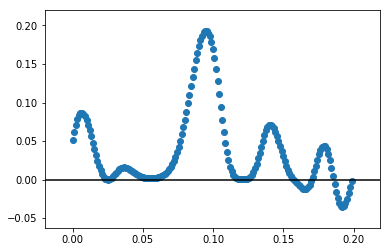

In [89]:
#plt.scatter(archerfish.t, archerfish.Pinte) # s=0.000000001
plt.scatter(archerfish.t, archerfish.Ptail)
plt.axhline(y=0,color='black')
print(archerfish.Pinte) 

In [109]:
print(np.mean(archerfish.Pinte))

0.0042908739958771374


In [110]:
print(np.mean(archerfish.Ptail))

-0.0036382739991065935


In [53]:
print(np.transpose(archerfish.body)[0])

[[[-0.015116246040000001 -0.00134096933]
  [-0.01521357949 -0.0064023088900000006]
  [-0.01579758021 -0.01068498083]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[-0.0150580783 -0.00160330434]
  [-0.014954152540000001 -0.00534463165]
  [-0.015577707089999998 -0.01054091959]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[-0.01495415282 -0.00105730568]
  [-0.01505187405 -0.0041843852300000005]
  [-0.01554048023 -0.00994993814]
  ...
  [-- --]
  [-- --]
  [-- --]]

 ...

 [[0.007063759950000001 0.1734466471]
  [0.00780015926 0.1686191405]
  [0.00951842433 0.162155191]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[0.00748954546 0.17341213239999997]
  [0.00838105785 0.16822515119999998]
  [0.010245129200000001 0.1612551453]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[0.00719405482 0.1733671515]
  [0.00861140053 0.16786451530000002]
  [0.01036223934 0.1632789851]
  ...
  [-- --]
  [-- --]
  [-- --]]]


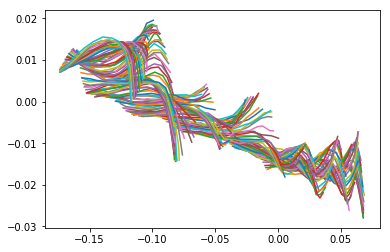

In [52]:
for i in range(len(archerfish.body)):
    plt.plot(np.transpose(archerfish.body[i])[0],np.transpose(archerfish.body[i])[1])

In [64]:
print(archerfish.shiftedy)

[[0.06735475061 0.0670924156 0.06763841426 ... 0.24214236703999997
  0.24210785233999998 0.24206287144]
 [0.06229341105 0.06335108829 0.06451133470999999 ... 0.23731486044
  0.23692087114 0.23656023524000003]
 [0.05801073911 0.058154800349999994 0.058745781799999994 ...
  0.23085091094 0.22995086524000002 0.23197470504]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


Text(0,0.5,'z (m)')

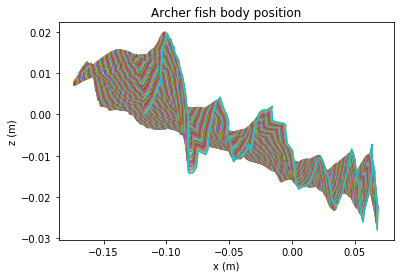

In [56]:
plt.plot(archerfish.xa,archerfish.za)
plt.title('Archer fish body position')
plt.xlabel('x (m)')
plt.ylabel('z (m)')

In [81]:
print(np.transpose(archerfish.body[0])[0]-np.min(np.transpose(archerfish.body)[0]))

[0.012848015820000001 0.012750682370000002 0.012166681650000004
 0.011290680570000003 0.010804013300000002 0.010901346760000003
 0.011582680930000002 0.011874681290000005 0.012458682010000003
 0.011680014380000003 0.009246678050000002 0.00700800863
 0.0032120039500000003 0.0 -- -- -- -- -- -- -- -- -- --]


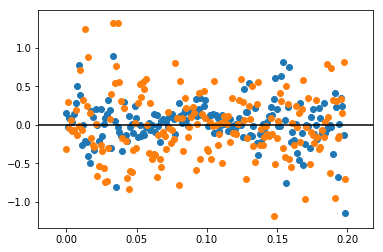

In [57]:
plt.scatter(archerfish.t,archerfish.p)
plt.scatter(archerfish.t,archerfish.q)
plt.axhline(y=0,color='black')

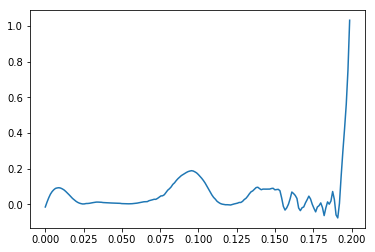

In [67]:
plt.plot(archerfish.t, archerfish.p)

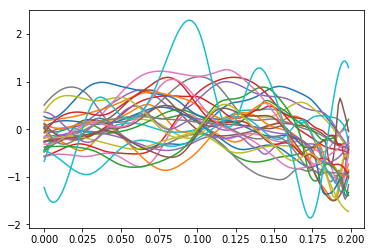

In [68]:
plt.plot(archerfish.t,archerfish.w[:,150:])

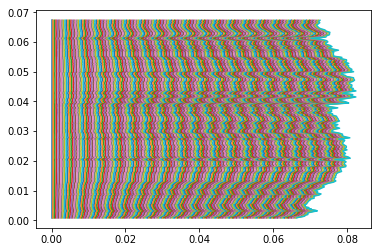

In [137]:
plt.plot(archerfish.a_new,archerfish.xa[0])

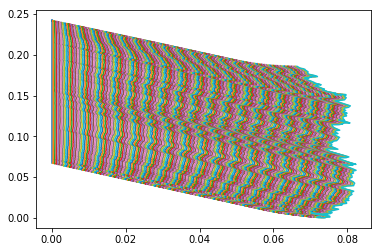

In [9]:
plt.plot(archerfish.a_new,archerfish.xt)

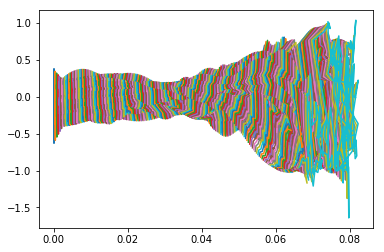

In [32]:
plt.plot(archerfish.a_new,archerfish.dzda)

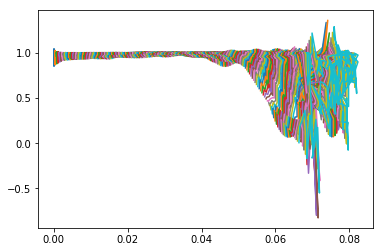

In [110]:
plt.plot(archerfish.a_new,archerfish.dxda)

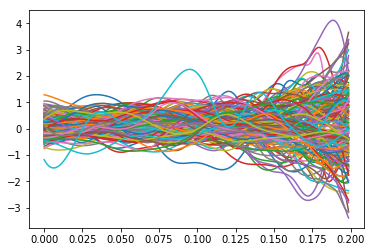

In [14]:
plt.plot(archerfish.t,archerfish.dzdt)

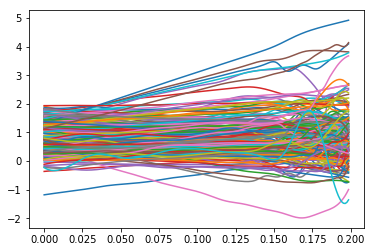

In [15]:
plt.plot(archerfish.t,archerfish.dxdt)

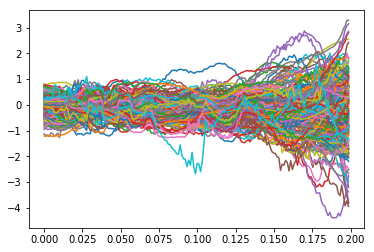

In [16]:
plt.plot(archerfish.t,archerfish.w)

In [21]:
print(archerfish.a_new)

[[0.         0.00040559 0.00081118 ... 0.07178918 0.07219477 0.07260036]
 [0.         0.00040327 0.00080653 ... 0.0713781  0.07178136 0.07218463]
 [0.         0.00040528 0.00081055 ... 0.0717339  0.07213917 0.07254445]
 ...
 [0.         0.00037596 0.00075192 ... 0.06654487 0.06692083 0.06729679]
 [0.         0.00037204 0.00074409 ... 0.06585158 0.06622362 0.06659567]
 [0.         0.00037065 0.0007413  ... 0.06560547 0.06597612 0.06634678]]


In [22]:
print(archerfish.dzda)

[[ 1.00949427e-01  7.73069969e-02  5.48626125e-02 ... -9.37181240e-01
  -9.51315714e-01 -9.66352390e-01]
 [ 1.39257594e-01  1.11448325e-01  8.50980061e-02 ... -9.24631845e-01
  -9.40994765e-01 -9.58683833e-01]
 [ 1.21306174e-02 -9.13216011e-04 -1.30845807e-02 ... -8.86383526e-01
  -8.71632567e-01 -8.54770113e-01]
 ...
 [ 7.18181902e-02  8.59450505e-02  9.95585895e-02 ... -8.80754660e-01
  -8.58758648e-01 -8.34824645e-01]
 [ 1.21496346e-01  1.28820426e-01  1.36013386e-01 ... -9.69744244e-01
  -9.56911500e-01 -9.42550254e-01]
 [ 1.07042957e-01  1.30976654e-01  1.53748270e-01 ... -9.71495140e-01
  -9.63963512e-01 -9.55448027e-01]]


In [3]:
archerfish = Lighthill("Mendelson_midlinedata.csv", midlinetime,archers, mdata, 180)
print(archerfish.body)

NameError: name 'midlinetime' is not defined

In [29]:
print(archerfish.a_new)

[[0.         0.00040559 0.00081118 ... 0.07178918 0.07219477 0.07260036]
 [0.         0.00040327 0.00080653 ... 0.0713781  0.07178136 0.07218463]
 [0.         0.00040528 0.00081055 ... 0.0717339  0.07213917 0.07254445]
 ...
 [0.         0.00037596 0.00075192 ... 0.06654487 0.06692083 0.06729679]
 [0.         0.00037204 0.00074409 ... 0.06585158 0.06622362 0.06659567]
 [0.         0.00037065 0.0007413  ... 0.06560547 0.06597612 0.06634678]]


In [31]:
print(archerfish.a[0])

[0.0 0.00506227537201503 0.009384582138849594 0.017123662881538607
 0.023566078783933592 0.03174266819928135 0.03839631926405308
 0.04463250027722998 0.05059849312975303 0.05610450471468911
 0.061720400363447704 0.06456313713295131 0.06907210344747172
 0.07260035720841619 -- -- -- -- -- -- -- -- -- --]


In [14]:
print(archerfish.tail)
print(archerfish.underwaterTail)

[[0.06791705130999999 0.06801186421 0.06770318855 0.06798471927
  0.06799635333000001 0.06804773177000001 0.06820905263 0.06831452914
  0.06869571994 0.0676651867 0.06755835342 0.06692549333
  0.06650164541999999 0.06585695448000001 0.06597755582999999
  0.06270021144 0.06402429747 0.06354772237 0.06375808091 0.06428255843
  0.06347538723 0.06340461866 0.0622269241 0.06107675939
  0.059726692569999996 0.058049921600000005 0.05661182941
  0.055231710219999994 0.054487555939999995 0.053874861169999996
  0.05408542484 0.05287631738 0.051668955270000004 0.05085189872
  0.05035049546 0.047475474870000006 0.04725211194 0.045294391579999996
  0.04501693273 0.042965754939999996 0.041338427510000005
  0.039840423029999995 0.03770218781 0.03594378758 0.03220730786
  0.03105481759 0.03043882542 0.02955933377 0.02915856052 0.02789613378
  -0.08192159504999999 -0.08216085729 -0.08316909159 -0.0835118903
  -0.08415735610000001 -0.08458488553 -0.0857786766 -0.08713591462
  -0.08830314078000001 -0.089

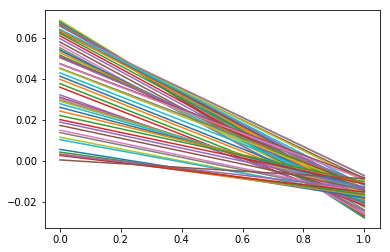

In [49]:
plt.plot(archerfish.underwaterTail)

In [18]:
print(len(archerfish.underwaterTail[0]))

66


In [16]:
print(archerfish.a[0])

[0.0 0.00506227537201503 0.009384582138849594 0.017123662881538607
 0.023566078783933592 0.03174266819928135 0.03839631926405308
 0.04463250027722998 0.05059849312975303 0.05610450471468911
 0.061720400363447704 0.06456313713295131 0.06907210344747172
 0.07260035720841619 -- -- -- -- -- -- -- -- -- --]


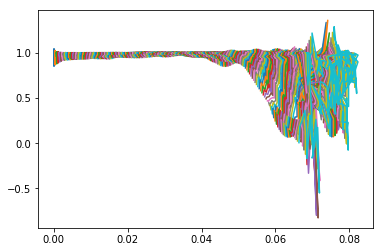

In [84]:
plt.plot(archerfish.a_new,archerfish.dxda)

Text(0,0.5,'dz/da')

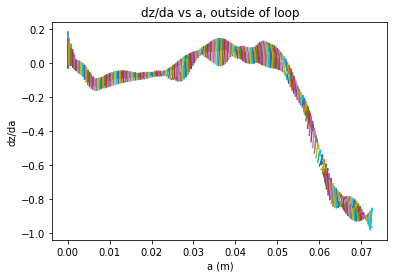

In [90]:
plt.plot(archerfish.a_new[:],archerfish.dzda[:5])
plt.title('dz/da vs a, outside of loop')
plt.xlabel('a (m)')
plt.ylabel('dz/da')

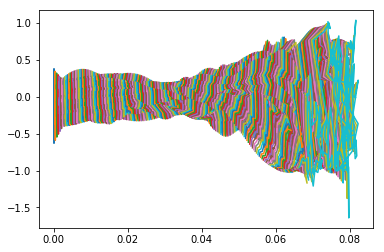

In [114]:
plt.plot(archerfish.a_new,archerfish.dzda)

Text(0,0.5,'dz/da')

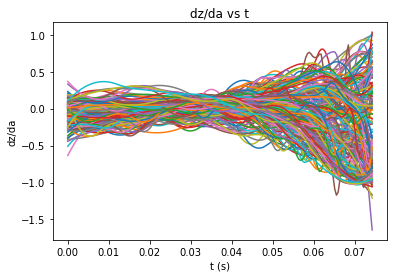

In [117]:
plt.plot(archerfish.a_new[20],np.transpose(archerfish.dzda))
plt.title('dz/da vs t')
plt.xlabel('t (s)')
plt.ylabel('dz/da')

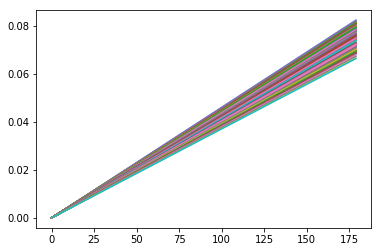

In [124]:
plt.plot(np.transpose(archerfish.a_new))

In [120]:
print(archerfish.dzda)

[[ 1.00949427e-01  7.73069969e-02  5.48626125e-02 ... -9.37181240e-01
  -9.51315714e-01 -9.66352390e-01]
 [ 1.39257594e-01  1.11448325e-01  8.50980061e-02 ... -9.24631845e-01
  -9.40994765e-01 -9.58683833e-01]
 [ 1.21306174e-02 -9.13216011e-04 -1.30845807e-02 ... -8.86383526e-01
  -8.71632567e-01 -8.54770113e-01]
 ...
 [ 7.18181902e-02  8.59450505e-02  9.95585895e-02 ... -8.80754660e-01
  -8.58758648e-01 -8.34824645e-01]
 [ 1.21496346e-01  1.28820426e-01  1.36013386e-01 ... -9.69744244e-01
  -9.56911500e-01 -9.42550254e-01]
 [ 1.07042957e-01  1.30976654e-01  1.53748270e-01 ... -9.71495140e-01
  -9.63963512e-01 -9.55448027e-01]]


In [90]:
print(archerfish.body)

[[[0.00134096933 -0.015116246040000001]
  [0.0064023088900000006 -0.01521357949]
  [0.01068498083 -0.01579758021]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[0.00160330434 -0.0150580783]
  [0.00534463165 -0.014954152540000001]
  [0.01054091959 -0.015577707089999998]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[0.00105730568 -0.01495415282]
  [0.0041843852300000005 -0.01505187405]
  [0.00994993814 -0.01554048023]
  ...
  [-- --]
  [-- --]
  [-- --]]

 ...

 [[-0.1734466471 0.007063759950000001]
  [-0.1686191405 0.00780015926]
  [-0.162155191 0.00951842433]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[-0.17341213239999997 0.00748954546]
  [-0.16822515119999998 0.00838105785]
  [-0.1612551453 0.010245129200000001]
  ...
  [-- --]
  [-- --]
  [-- --]]

 [[-0.1733671515 0.00719405482]
  [-0.16786451530000002 0.00861140053]
  [-0.1632789851 0.01036223934]
  ...
  [-- --]
  [-- --]
  [-- --]]]


In [92]:
np.transpose(archerfish.body[0])[0]

masked_array(data=[0.00134096933, 0.0064023088900000006, 0.01068498083,
                   0.018374323640000002, 0.02479833155, 0.03297434162,
                   0.039593016429999996, 0.04582235744, 0.05175969808,
                   0.05721037145999999, 0.062271711029999996,
                   0.06402371319, 0.06645704952, 0.06791705130999999, --,
                   --, --, --, --, --, --, --, --, --],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False,  True,  True,
                    True,  True,  True,  True,  True,  True,  True,  True],
       fill_value=1e+20)

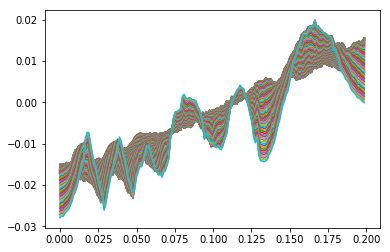

In [110]:
plt.plot(archerfish.t,archerfish.za)

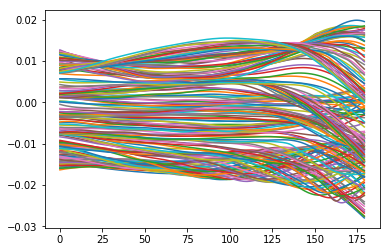

In [103]:
for i in range(len(archerfish.a_new)):
    plt.plot(archerfish.za[i])
plt.show()

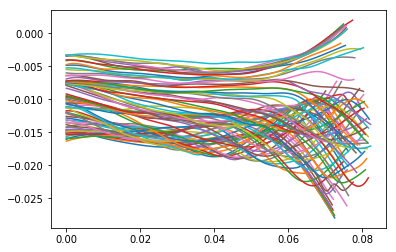

In [133]:
plt.plot(np.transpose(archerfish.a_new)[:,:80],np.transpose(archerfish.za)[:,:80])

In [125]:
np.array([[5,10,15],[1,2,3],[10,20,30]])*np.array([[5,10,15],[1,2,3],[10,20,30]])

array([[ 25, 100, 225],
       [  1,   4,   9],
       [100, 400, 900]])

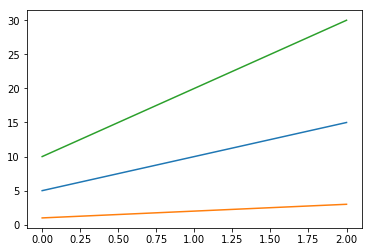

In [121]:
plt.plot(np.transpose(np.array([[5,10,15],[1,2,3],[10,20,30]])))

In [138]:
archerfish25 = Lighthill("Mendelson_midlinedata.csv", midlinetime, mdata, 25)

ValueError: operands could not be broadcast together with shapes (180,180) (25,180) 

In [142]:
print(archerfish.xa[0])

[0.00134097 0.00175004 0.00215834 0.00256592 0.00297283 0.00337909
 0.00378475 0.00418986 0.00459445 0.00499857 0.00540225 0.00580554
 0.00620848 0.00661111 0.00701348 0.00741561 0.00781756 0.00821936
 0.00862106 0.0090227  0.00942432 0.00982595 0.01022765 0.01062945
 0.01103139 0.01143347 0.01183569 0.01223805 0.01264053 0.01304314
 0.01344586 0.0138487  0.01425164 0.01465469 0.01505783 0.01546106
 0.01586438 0.01626778 0.01667125 0.01707479 0.0174784  0.01788207
 0.01828578 0.01868955 0.01909337 0.01949725 0.0199012  0.02030522
 0.02070933 0.02111352 0.0215178  0.02192219 0.0223267  0.02273131
 0.02313605 0.02354093 0.02394594 0.0243511  0.02475641 0.02516188
 0.02556749 0.02597322 0.02637905 0.02678495 0.02719091 0.02759691
 0.02800291 0.0284089  0.02881487 0.02922077 0.02962661 0.03003234
 0.03043796 0.03084343 0.03124874 0.03165387 0.03205879 0.03246348
 0.03286793 0.03327211 0.03367603 0.03407973 0.03448325 0.03488662
 0.03528986 0.03569302 0.03609613 0.03649921 0.03690231 0.0373

In [141]:
print(archerfish.xt[0])

[0.00134097 0.00175004 0.00215834 0.00256592 0.00297283 0.00337909
 0.00378475 0.00418986 0.00459445 0.00499857 0.00540225 0.00580554
 0.00620848 0.00661111 0.00701348 0.00741561 0.00781756 0.00821936
 0.00862106 0.0090227  0.00942432 0.00982595 0.01022765 0.01062945
 0.01103139 0.01143347 0.01183569 0.01223805 0.01264053 0.01304314
 0.01344586 0.0138487  0.01425164 0.01465469 0.01505783 0.01546106
 0.01586438 0.01626778 0.01667125 0.01707479 0.0174784  0.01788207
 0.01828578 0.01868955 0.01909337 0.01949725 0.0199012  0.02030522
 0.02070933 0.02111352 0.0215178  0.02192219 0.0223267  0.02273131
 0.02313605 0.02354093 0.02394594 0.0243511  0.02475641 0.02516188
 0.02556749 0.02597322 0.02637905 0.02678495 0.02719091 0.02759691
 0.02800291 0.0284089  0.02881487 0.02922077 0.02962661 0.03003234
 0.03043796 0.03084343 0.03124874 0.03165387 0.03205879 0.03246348
 0.03286793 0.03327211 0.03367603 0.03407973 0.03448325 0.03488662
 0.03528986 0.03569302 0.03609613 0.03649921 0.03690231 0.0373

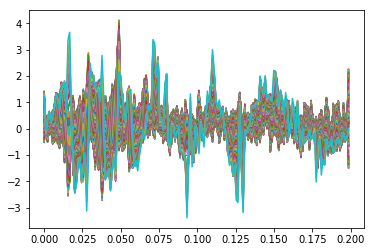

In [152]:
plt.plot(np.transpose(archerfish.t),np.transpose(archerfish.dzdt))

In [154]:
print(archerfish.t)

[0.      0.00111 0.00222 0.00333 0.00444 0.00555 0.00666 0.00777 0.00888
 0.00999 0.0111  0.01221 0.01332 0.01443 0.01554 0.01665 0.01776 0.01887
 0.01998 0.02109 0.0222  0.02331 0.02442 0.02553 0.02664 0.02775 0.02886
 0.02997 0.03108 0.03219 0.0333  0.03441 0.03552 0.03663 0.03774 0.03885
 0.03996 0.04107 0.04218 0.04329 0.0444  0.04551 0.04662 0.04773 0.04884
 0.04995 0.05106 0.05217 0.05328 0.05439 0.0555  0.05661 0.05772 0.05883
 0.05994 0.06105 0.06216 0.06327 0.06438 0.06549 0.0666  0.06771 0.06882
 0.06993 0.07104 0.07215 0.07326 0.07437 0.07548 0.07659 0.0777  0.07881
 0.07992 0.08103 0.08214 0.08325 0.08436 0.08547 0.08658 0.08769 0.0888
 0.08991 0.09102 0.09213 0.09324 0.09435 0.09546 0.09657 0.09768 0.09879
 0.0999  0.10101 0.10212 0.10323 0.10434 0.10545 0.10656 0.10767 0.10878
 0.10989 0.111   0.11211 0.11322 0.11433 0.11544 0.11655 0.11766 0.11877
 0.11988 0.12099 0.1221  0.12321 0.12432 0.12543 0.12654 0.12765 0.12876
 0.12987 0.13098 0.13209 0.1332  0.13431 0.13542 0.1

In [155]:
print(archerfish.dzdt)

[[-0.15989141  0.16885655 -0.07744503 ...  0.11639049  0.354741
  -1.18320618]
 [-0.09245914  0.14047948 -0.12289679 ...  0.04384877  0.40949351
  -1.29055353]
 [-0.02602176  0.11213582 -0.1560371  ... -0.02003663  0.45842789
  -1.37398441]
 ...
 [ 1.30269825 -0.194569    0.39039059 ... -0.43122731 -0.31405643
  -0.1289202 ]
 [ 1.27155686 -0.16685696  0.38266631 ... -0.43100756 -0.34958005
  -0.07263298]
 [ 1.20896772 -0.12150195  0.36912013 ... -0.43275208 -0.38861725
  -0.01562437]]


In [159]:
print(np.transpose(archerfish.dzdt))

[[-0.15989141 -0.09245914 -0.02602176 ...  1.30269825  1.27155686
   1.20896772]
 [ 0.16885655  0.14047948  0.11213582 ... -0.194569   -0.16685696
  -0.12150195]
 [-0.07744503 -0.12289679 -0.1560371  ...  0.39039059  0.38266631
   0.36912013]
 ...
 [ 0.11639049  0.04384877 -0.02003663 ... -0.43122731 -0.43100756
  -0.43275208]
 [ 0.354741    0.40949351  0.45842789 ... -0.31405643 -0.34958005
  -0.38861725]
 [-1.18320618 -1.29055353 -1.37398441 ... -0.1289202  -0.07263298
  -0.01562437]]


In [156]:
print(np.diff(archerfish.z)/np.diff(archerfish.t))

[[0.03253053404049559 0.024110585408085167 0.01612839679933658 ...
  -0.33999648013130357 -0.3449963178873897 -0.35032581585953043]
 [0.04549690811147206 0.035658743799401794 0.026350619960158524 ...
  -0.3331497158622577 -0.33885351344507997 -0.3450391041807637]
 [0.002021267809042283 -0.0025819397857748494 -0.0068665970544723185 ...
  -0.326002466232019 -0.32100215607723614 -0.3152309104013354]
 ...
 [0.026731887515310204 0.031429758260739966 0.03595376580753182 ...
  -0.30176532144498214 -0.29464341901411495 -0.286865114508599]
 [0.0419534631993926 0.04438632822559871 0.046775245381643196 ...
  -0.32696991418097104 -0.32292487233658596 -0.3183675169458272]
 [0.03977221852103999 0.04757016245684261 0.05498006287471188 ...
  -0.32552329257052026 -0.32317258864681914 -0.32049335400599427]]


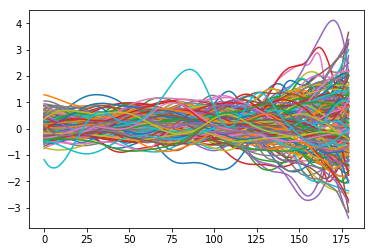

In [157]:
plt.plot(archerfish.dzdt)

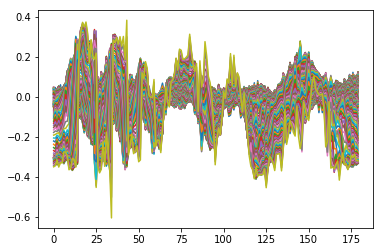

In [158]:
plt.plot(np.diff(archerfish.z)/np.diff(archerfish.t))

In [161]:
print(np.transpose(archerfish.x))

[[ 0.00134097  0.0016033   0.00105731 ... -0.17344665 -0.17341213
  -0.17336715]
 [ 0.00175004  0.00200825  0.00146328 ... -0.17306945 -0.17304246
  -0.17299245]
 [ 0.00215834  0.00241268  0.00186895 ... -0.17269333 -0.17267326
  -0.17262059]
 ...
 [ 0.06763494  0.06770713  0.06737786 ... -0.11489053 -0.11671731
  -0.11719201]
 [ 0.06778061  0.06786408  0.06753942 ... -0.11479458 -0.11666271
  -0.11717938]
 [ 0.06791705  0.06801186  0.06770319 ... -0.11469835 -0.11659848
  -0.11717356]]
